[Lesson Video Link](https://course.fast.ai/videos/?lesson=2)

[Lesson resources and updates](https://forums.fast.ai/t/lesson-2-official-resources-and-updates/28630)

[Lesson chat](https://forums.fast.ai/t/lesson-2-chat/28722)

[Further discussion thread](https://forums.fast.ai/t/lesson-2-further-discussion/28706)

Note: This is a mirror of the FastAI Lesson 2 Nb. 
Please thank the amazing team behind fast.ai for creating these, I've merely created a mirror of the same here
For complete info on the course, visit course.fast.ai

In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

## Linear Regression problem
The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

`tensor` simply means array.
`torch.ones(x,y)` means create a tensor with x rows and y columns with all the values in every column being one. So `torch.ones(2,2)` will create `[[1,1][1,1]]`.
`x[:,0].uniform_(-1.,1)` means that for every single row (: represents the rows), column 0 (`x[:,0]`), replace the value of column 0 with a uniform random number between (-1.,1). We add a `.` at the end of `-1` because we want Python to understand that it is of type `float` not of type `int`.

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.8851,  1.0000],
        [-0.1338,  1.0000],
        [ 0.8733,  1.0000],
        [-0.5418,  1.0000],
        [ 0.8170,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

 a = tensor(a<sub>1</sub>, a<sub>2</sub>) is an array that represents the values of the slope(gradient) and y-intercept in y<sub>i</sub> = a<sub>1</sub>x<sub>i,1</sub> + a<sub>2</sub>x<sub>i,2</sub> where x<sub>i,2</sub> (i.e. the equation of a straight line `y = mx + c`).

`x@a` represents matrix multiplication. 

`torch.rand(n)` returns a tensor filled with `n`  tensor filled with random numbers from a uniform distribution on the interval `[0,1)` e.g. `torch.rand(4)`
returns `tensor([ 0.5204,  0.2503,  0.3525,  0.5673])`.

`y = x@a + torch.rand(n)` means perform matrix multiplication and then add some noise to each matrix multiplication result.

In [5]:
y = x@a + torch.rand(n)

`plt.scatter(x[:,0], y);` plots every x column 0 on the x-axis against y on the y-axis.

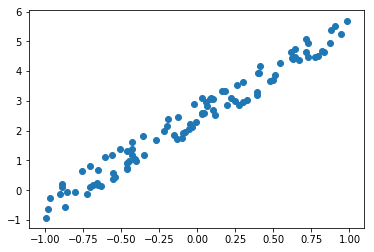

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the **mean squared error**.

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

`mse` is a loss function. This is something that tells us how good our line is. Now we have to come up with what is the line that fits through the scatterplot (line of best fit). We are going to pretend we don't know. So what we actually have to do is guess what the values of a<sub>1</sub> and a<sub>2</sub> in a = tensor(a<sub>1</sub>, a<sub>2</sub>) are. So let's say we guess that a<sub>1</sub> and a<sub>2</sub> are -1 and 1 respectively i.e. `a = (-1.0,1.0)` then we can compute `y_hat` which is our prediction and then compute our error.

In [8]:
a = tensor(-1.,1)
a

tensor([-1.,  1.])

We now calculate our loss by first obtaining our predictions `y_hat` and then getting the **mean squared error**

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(6.7842)

For this regression, our loss is 6.7842.

So we can now plot a scatter plot of x against y and we can plot the scatter plot of x against y_hat.

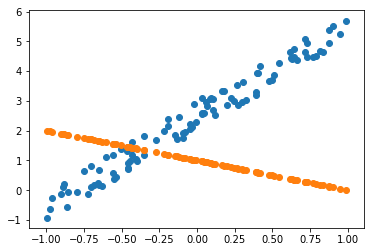

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);


So far we have specified the *model* (linear regression) and the *evaluation criteria* (or loss function). Now we need to handle *optimization*; that is, how do we find the best values for a? How do we find the best *fitting* linear regression.


## Gradient Descent

We would like to find the values of a that minimize mse_loss.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](https://pytorch.org).

Gradient Descent is basically about taking this guess and trying to make it a little bit better. How do we make it a little better? Well, there are only two numbers and the two numbers are the two numbers are the intercept of the orange line a<sub>2</sub> and the gradient of the orange line a<sub>1</sub>. So what we are going to do with gradient descent is we're going to simply say:

    What if we changed those two numbers a little bit?
    What if we made the intercept a little bit higher or a little bit lower?
    What if we made the gradient a little bit more positive or a little bit more negative?


There are 4 possibilities and then we can calculate the loss for each of those 4 possibilities and see what works. Did lifting it up or down make it better? Did tilting it more positive or more negative make it better? And then all we do is we say, okay, whichever one of those made it better, that's what we're going to do.

We don't actually have to move it up and down, and round about. We can actually calculate the derivative. The derivative is the thing that tells us would moving it up or down make it better, or would rotating it this way or that way make it better.
The derivative tells us how changing a<sub>1</sub> up or down would change our MSE, how changing a<sub>2</sub> up or down would change our MSE, and this does it more quickly than actually moving it up and down.

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

We calculate the gradient using `.grad`.
We are going to create a loop. We're going to loop through 100 times, and we're going to call a function called `update`. That function is going to:

    Calculate y_hat (i.e. our prediction)

    Calculate loss (i.e. our mean squared error)

    From time to time, it will print that out so we can see how we're going

    Calculate the gradient. In PyTorch, calculating the gradient is done by using a method called `backward`. Mean squared error (`loss = mse(y, y_hat)`) is just a simple standard mathematical function. PyTorch keeps track of how it was calculated and lets us calculate the derivative (`loss.backward()`). So if we do a mathematical operation on a tensor in PyTorch, we can call backward to calculate the derivative and the derivative gets stuck inside an attribute called `.grad`.

    We will take our coefficient `a`and subtract from them our gradient (sub_). There is an underscore there because that's going to do it in-place. It's going to actually update those coefficients a to subtract the gradients from them. Why do we subtract? Because the gradient tells us if we move the whole thing downwards, the loss goes up. If we move the whole thing upwards, the loss goes down. So we want to do the opposite of the thing that makes it go up. We want our loss to be small. That's why we subtract.

    lr is our learning rate. All it is is the thing that we multiply by the gradient.


In [12]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(6.7842, grad_fn=<MeanBackward1>)
tensor(1.5670, grad_fn=<MeanBackward1>)
tensor(0.5181, grad_fn=<MeanBackward1>)
tensor(0.2151, grad_fn=<MeanBackward1>)
tensor(0.1260, grad_fn=<MeanBackward1>)
tensor(0.0998, grad_fn=<MeanBackward1>)
tensor(0.0921, grad_fn=<MeanBackward1>)
tensor(0.0898, grad_fn=<MeanBackward1>)
tensor(0.0892, grad_fn=<MeanBackward1>)
tensor(0.0890, grad_fn=<MeanBackward1>)


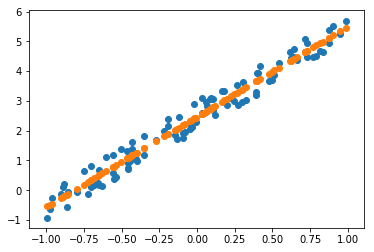

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## **Animate it!**

Let's now take a look at this as an animation. This is one of the nice things that you can do with matplotlib. We can take any plot and turn it into an animation. So we can now actually see it updating each step.

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

We create a scatter plot `fig = plt.figure(); plt.scatter(x[:,0], y, c='orange')`, but rather than having a loop, we used matplotlib's `FuncAnimation` to call 100 times the `animate` function, which calls the `update` function we created earlier and then updates the y data in our line `line, = plt.plot(x[:,0], x@a)`. Repeat that 100 times `np.arange(0, 100)`, waiting 20 milliseconds after each one `interval=20`.

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use mini-batches.

## Vocab


- **Learning rate**: A thing we multiply our gradient by to decide how much to update the weights by.

- **Epoch**: One complete run through all of our data points (e.g. all of our images). So for the non-stochastic gradient descent we just did, every single loop, we did the entire dataset. But if we've got a dataset with a thousand images and our mini-batch size is 100, then it would take us 10 iterations to see every image once. So that would be one epoch. Epochs are important because if we do lots of epochs, then we are looking at our images lots of times, so every time we see an image, there's a bigger chance of overfitting. So we generally don't want to do too many epochs.

- **Mini-batch**: A random bunch of points that we use to update our weights.

- **SGD**: Stochastic gradient descent using mini-batches.

- **Model / Architecture**: They kind of mean the same thing. In this case, our architecture is <img src="http://latex.codecogs.com/gif.latex?\vec{y}&space;=&space;X\vec{a}" title="\vec{y} = X\vec{a}" />﹣ the architecture is the mathematical function that we're fitting the parameters to.

- **Parameters / Coefficients / Weights**: Numbers that we are updating.

- **Loss function**: The thing that's telling us how far away or how close we are to the correct answer. For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

These models / predictors / teddy bear classifiers are functions that take pixel values and return probabilities. They start with some functional form like <img src="http://latex.codecogs.com/gif.latex?\vec{y}&space;=&space;X\vec{a}" title="\vec{y} = X\vec{a}" /> and they fit the parameter `a` using SGD to try and do the best to calculate our predictions.